<a href="https://colab.research.google.com/github/Faremu/PMU-B-PersonalAI/blob/main/Homework_Mental_E_san_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Download Datasets**

In [44]:
!wget -q -cO - https://zenodo.org/records/3941387/files/teaching_2018_features_tfidf_256.csv?download=1 > teaching_2018.csv
!wget -q -cO -  https://zenodo.org/records/3941387/files/teaching_2019_features_tfidf_256.csv?download=1 > teaching_2019.csv
!wget -q -cO -  https://zenodo.org/records/3941387/files/mentalhealth_2018_features_tfidf_256.csv?download=1 > mental.csv

# **Import packages**

In [45]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import KernelPCA, PCA

# **Load data**

In [3]:
teaching_2018 = pd.read_csv('teaching_2018.csv')
teaching_2019 = pd.read_csv('teaching_2019.csv')
mental = pd.read_csv('mental.csv')

In [4]:
teaching_2018#.head(2)

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,teaching,wdead,2018/01/01,Looking for BIG digital timers for my 7th grad...,6.205652,6.216433,6.272283,80.817554,66.028986,9.218841,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.133644
1,teaching,tiger-bulldog1318,2018/01/02,School turnaround from the teacher’s perspecti...,7.191104,10.905849,6.144719,67.801364,70.060606,8.619913,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.260589,0.0,0.0,0.118115
2,teaching,PMcommenter,2018/01/02,Where on high school &amp; college campuses ca...,6.961154,8.008078,7.135026,71.693308,64.512821,9.829744,...,0.0,0.139954,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
3,teaching,amylizzie12,2018/01/02,What have you used to keep your students busy ...,7.132836,9.284230,5.662866,78.329522,64.970149,8.345075,...,0.0,0.000000,0.0,0.416899,0.0,0.0,0.000000,0.0,0.0,0.000000
4,teaching,ravensandcrowsohmy,2018/01/02,"Flexible, Free Vocabulary App/Website with a F...",7.278080,8.537186,6.422609,76.326014,63.891304,9.176812,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,teaching,Markenheimer15,2018/04/20,Looking for advice from someone who has switch...,6.408706,6.600744,5.894118,83.083529,65.588235,7.741176,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
545,teaching,ahoradevoar,2018/04/20,[UK] Another job interview with a teaching rec...,3.253971,5.589391,4.143568,84.318843,76.071823,8.236724,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
546,teaching,Amandamc2315,2018/04/20,Need Advice? I noticed a lot of people post he...,7.296107,7.824211,6.973201,74.951251,63.701987,9.625018,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
547,teaching,notwutiwantd,2018/04/20,"Oh, you only want singles? OK! I posted this o...",4.526126,6.612732,5.062922,80.279760,71.549669,7.348556,...,0.0,0.000000,0.0,0.205255,0.0,0.0,0.000000,0.0,0.0,0.000000


In [5]:
teaching_2019.head(2)

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,teaching,Nakatsukasa,2019/01/01,"First time teaching class of 9-13 Hello, I'm c...",9.250539,9.015402,9.298815,62.458419,59.849673,11.833007,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.144586,0.0,0.0,0.000000
1,teaching,zdnewcomb,2019/01/01,How do I get my 6th graders to care about poet...,4.613466,5.944906,5.441854,80.658888,70.085526,8.816746,...,0.0,0.0,0.0,0.08273,0.0,0.0,0.080726,0.0,0.0,0.219539


In [6]:
mental.head(2)

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,mentalhealth,LilUziVertsAutotune,2018/01/01,Any idea what this is? So I came here for awns...,1.198856,2.857999,2.614963,96.068711,79.778689,6.075708,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.156102,0.120129,0.0,0.070755
1,mentalhealth,Kyzzen,2018/01/01,"Advice, please. I've been getting so easily en...",3.750551,6.140822,4.610385,81.303782,74.730769,7.564103,...,0.0,0.0,0.0,0.079632,0.0,0.11147,0.077702,0.119593,0.0,0.000000


**Combine data together**

In [7]:
df = pd.concat([teaching_2018, teaching_2019, mental])
del teaching_2018, teaching_2019, mental

In [ ]:
df

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,teaching,wdead,2018/01/01,Looking for BIG digital timers for my 7th grad...,6.205652,6.216433,6.272283,80.817554,66.028986,9.218841,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.133644
1,teaching,tiger-bulldog1318,2018/01/02,School turnaround from the teacher’s perspecti...,7.191104,10.905849,6.144719,67.801364,70.060606,8.619913,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.260589,0.000000,0.0,0.118115
2,teaching,PMcommenter,2018/01/02,Where on high school &amp; college campuses ca...,6.961154,8.008078,7.135026,71.693308,64.512821,9.829744,...,0.0,0.139954,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,teaching,amylizzie12,2018/01/02,What have you used to keep your students busy ...,7.132836,9.284230,5.662866,78.329522,64.970149,8.345075,...,0.0,0.000000,0.000000,0.416899,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,teaching,ravensandcrowsohmy,2018/01/02,"Flexible, Free Vocabulary App/Website with a F...",7.278080,8.537186,6.422609,76.326014,63.891304,9.176812,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,mentalhealth,riverisaberry,2018/04/20,Does Anyone Have Chronic Hyperventilation Synd...,-0.313579,1.816079,2.206408,94.016471,89.141844,5.019775,...,0.0,0.000000,0.203621,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3356,mentalhealth,eshmaalfatin,2018/04/20,Psychiatrist in Dubai &amp; Abu Dhabi - Genera...,18.585441,21.801888,14.813529,19.135882,39.735294,19.741176,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3357,mentalhealth,themonstrumologist,2018/04/20,My best friend just brought this to my attenti...,0.995289,3.198568,2.559184,93.338197,83.438776,5.978231,...,0.0,0.128253,0.000000,0.000000,0.0,0.000000,0.094513,0.145466,0.0,0.000000
3358,mentalhealth,scndplace,2018/04/20,Why do I get depressed instead of sad? i wanna...,1.554975,3.657596,3.223969,89.946908,80.614583,5.917105,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [8]:
j = 0
for i in df.columns:
  if i[:5] == 'tfidf':
    print(j)
  j +=1

94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
34

# **Data exploration**

<Axes: >

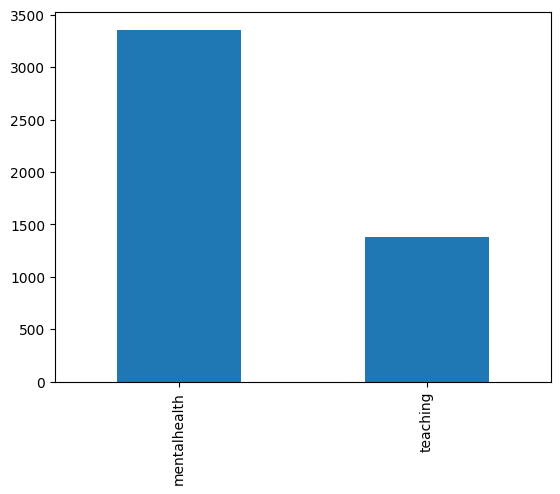

In [9]:
df.subreddit.value_counts().plot(kind='bar')

In [10]:
df[df.subreddit == 'mentalhealth']

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,mentalhealth,LilUziVertsAutotune,2018/01/01,Any idea what this is? So I came here for awns...,1.198856,2.857999,2.614963,96.068711,79.778689,6.075708,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.156102,0.120129,0.0,0.070755
1,mentalhealth,Kyzzen,2018/01/01,"Advice, please. I've been getting so easily en...",3.750551,6.140822,4.610385,81.303782,74.730769,7.564103,...,0.0,0.000000,0.000000,0.079632,0.0,0.111470,0.077702,0.119593,0.0,0.000000
2,mentalhealth,somerandomperson93,2018/01/01,Can aggressive behavior in humans be modified ...,2.283719,5.060112,4.120739,80.276724,83.655172,7.452217,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,mentalhealth,121802,2018/01/01,I heard my parents having sex and i need serio...,2.321256,3.903792,3.250098,93.091890,76.335984,6.380933,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.186966,0.000000,0.0,0.084745
4,mentalhealth,Mewdot,2018/01/01,From the inside out This will probably be a lo...,3.879535,4.522727,5.183793,84.385645,71.224138,8.017683,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.051410,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,mentalhealth,riverisaberry,2018/04/20,Does Anyone Have Chronic Hyperventilation Synd...,-0.313579,1.816079,2.206408,94.016471,89.141844,5.019775,...,0.0,0.000000,0.203621,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3356,mentalhealth,eshmaalfatin,2018/04/20,Psychiatrist in Dubai &amp; Abu Dhabi - Genera...,18.585441,21.801888,14.813529,19.135882,39.735294,19.741176,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3357,mentalhealth,themonstrumologist,2018/04/20,My best friend just brought this to my attenti...,0.995289,3.198568,2.559184,93.338197,83.438776,5.978231,...,0.0,0.128253,0.000000,0.000000,0.0,0.000000,0.094513,0.145466,0.0,0.000000
3358,mentalhealth,scndplace,2018/04/20,Why do I get depressed instead of sad? i wanna...,1.554975,3.657596,3.223969,89.946908,80.614583,5.917105,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [11]:
txt = ' '.join(df[df.subreddit == 'teaching'].post.values)
word_list = txt.split()
Counter(word_list).most_common()

[('I', 7943),
 ('to', 6939),
 ('the', 6099),
 ('and', 5863),
 ('a', 5715),
 ('in', 3447),
 ('of', 3422),
 ('my', 2788),
 ('for', 2679),
 ('that', 2127),
 ('is', 2076),
 ('have', 2004),
 ('with', 1628),
 ('this', 1399),
 ('be', 1352),
 ('but', 1347),
 ('on', 1323),
 ('it', 1298),
 ('you', 1246),
 ("I'm", 1083),
 ('was', 1070),
 ('are', 1038),
 ('at', 1038),
 ('me', 1036),
 ('as', 1031),
 ('or', 1024),
 ('not', 971),
 ('am', 969),
 ('do', 937),
 ('school', 892),
 ('teaching', 888),
 ('so', 875),
 ('about', 867),
 ('they', 823),
 ('an', 812),
 ('if', 751),
 ('just', 737),
 ('would', 733),
 ('like', 725),
 ('what', 695),
 ('teacher', 688),
 ('can', 666),
 ('students', 662),
 ('get', 660),
 ('from', 635),
 ('know', 632),
 ('any', 628),
 ('out', 582),
 ('all', 573),
 ('been', 570),
 ('some', 564),
 ('them', 545),
 ('I’m', 543),
 ('how', 536),
 ('their', 507),
 ('want', 503),
 ('will', 491),
 ('had', 470),
 ('has', 466),
 ('year', 464),
 ('more', 462),
 ('up', 453),
 ("I've", 449),
 ('student

In [12]:
txt = ' '.join(df[df.subreddit == 'mentalhealth'].post.values)
word_list = txt.split()
Counter(word_list).most_common()[:20]

[('I', 40642),
 ('to', 25944),
 ('and', 24392),
 ('a', 17054),
 ('the', 16193),
 ('my', 13687),
 ('of', 12370),
 ('that', 8708),
 ('in', 8533),
 ('have', 7296),
 ('for', 7250),
 ('is', 7168),
 ('it', 6905),
 ('with', 6838),
 ('me', 6760),
 ('but', 6553),
 ('was', 5945),
 ('this', 5085),
 ('like', 5069),
 ("I'm", 4852)]

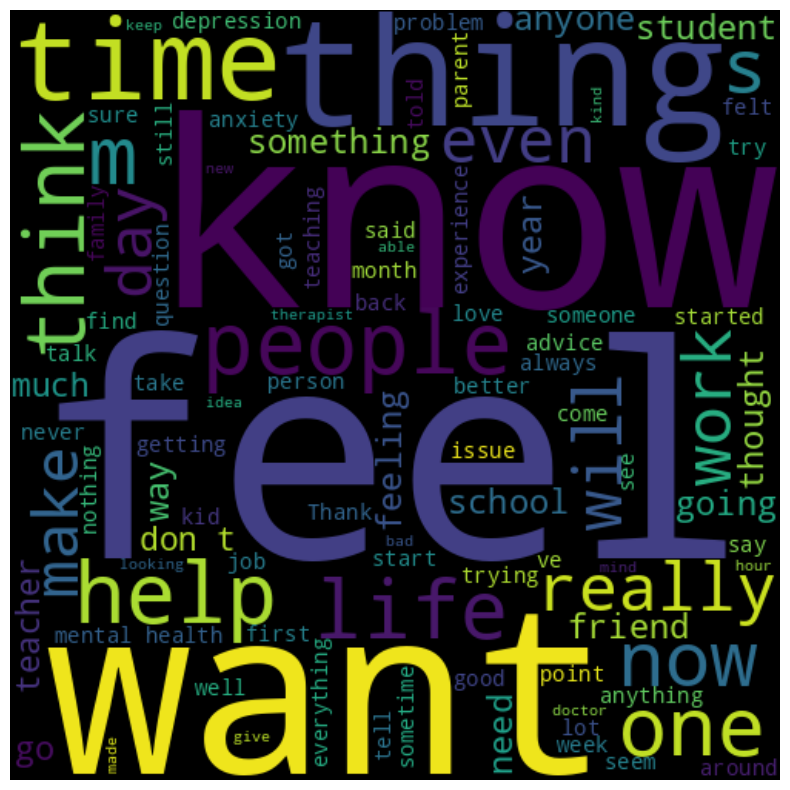

In [13]:
wordcloud = WordCloud(
        background_color = 'black',
        width = 500,
        height = 500,
        max_words=100,
        stopwords = set(STOPWORDS)).generate(str(' '.join(df.post.values)))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

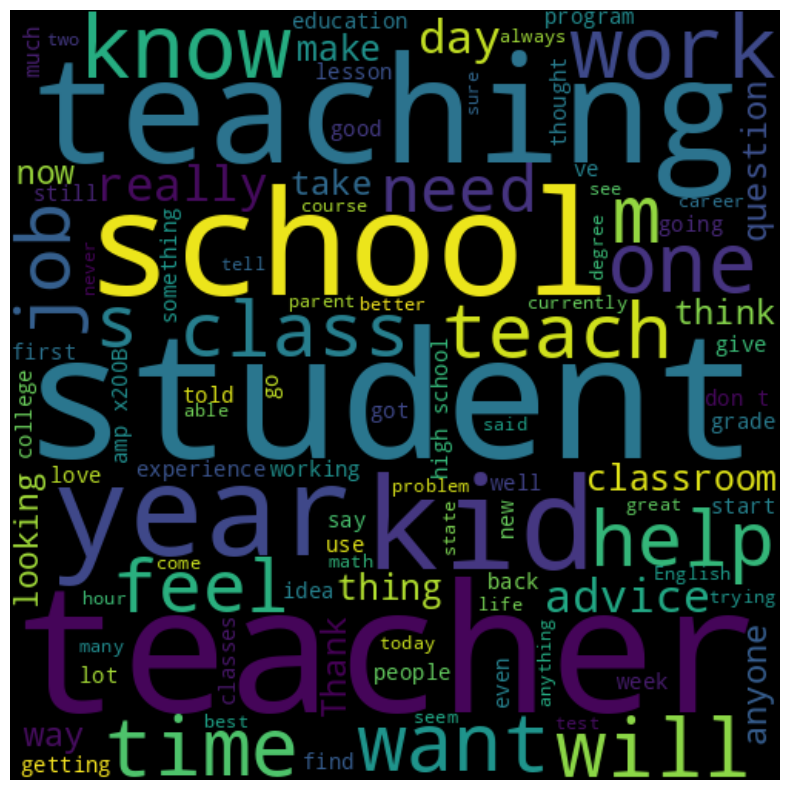

In [14]:
# สร้าง Wordcloud ประเภท Teaching ด้วยตนเอง
wordcloud = WordCloud(
        background_color = 'black',
        width = 500,
        height = 500,
        max_words=100,
        stopwords = set(STOPWORDS)).generate(str(' '.join(df[df.subreddit == 'teaching'].post.values)))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

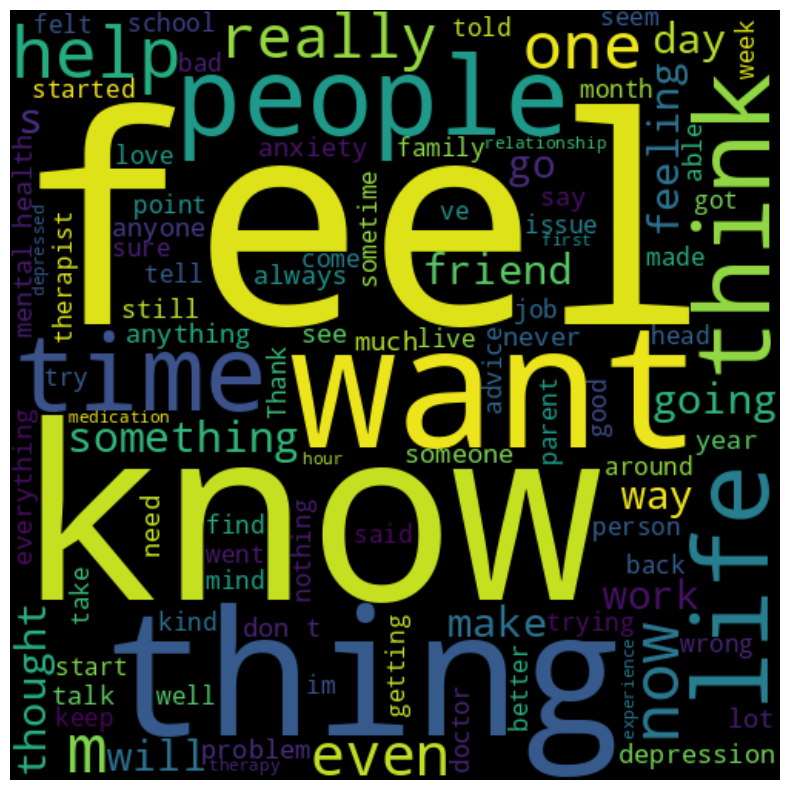

In [15]:
# สร้าง Wordcloud ประเภท Mentalhealth ด้วยตนเอง
wordcloud = WordCloud(
        background_color = 'black',
        width = 500,
        height = 500,
        max_words=100,
        stopwords = set(STOPWORDS)).generate(str(' '.join(df[df.subreddit == 'mentalhealth'].post.values)))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

# **Feature extraction**

In [19]:
vectorizer = CountVectorizer()

# ให้ทำการแปลงข้อความให้เป็น Feature โดยการระบุข้อมูลที่ใช้ในการแปลงให้ถูกต้อง

# X = vectorizer.fit_transform(_____)
X = vectorizer.fit_transform(df.post.values)

In [20]:
print(X.shape)
print(X.toarray())
print(vectorizer.get_feature_names_out())

(4736, 21793)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00' '000' '00pm' ... 'محمد' 'مدرسة' 'ㄅㄆㄇㄈ']


# **Split Data into training and test sets**

In [21]:
df['label'] = pd.Categorical(df.subreddit).codes

In [22]:
df

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year,label
0,teaching,wdead,2018/01/01,Looking for BIG digital timers for my 7th grad...,6.205652,6.216433,6.272283,80.817554,66.028986,9.218841,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.133644,1
1,teaching,tiger-bulldog1318,2018/01/02,School turnaround from the teacher’s perspecti...,7.191104,10.905849,6.144719,67.801364,70.060606,8.619913,...,0.000000,0.000000,0.000000,0.0,0.000000,0.260589,0.000000,0.0,0.118115,1
2,teaching,PMcommenter,2018/01/02,Where on high school &amp; college campuses ca...,6.961154,8.008078,7.135026,71.693308,64.512821,9.829744,...,0.139954,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1
3,teaching,amylizzie12,2018/01/02,What have you used to keep your students busy ...,7.132836,9.284230,5.662866,78.329522,64.970149,8.345075,...,0.000000,0.000000,0.416899,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1
4,teaching,ravensandcrowsohmy,2018/01/02,"Flexible, Free Vocabulary App/Website with a F...",7.278080,8.537186,6.422609,76.326014,63.891304,9.176812,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,mentalhealth,riverisaberry,2018/04/20,Does Anyone Have Chronic Hyperventilation Synd...,-0.313579,1.816079,2.206408,94.016471,89.141844,5.019775,...,0.000000,0.203621,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0
3356,mentalhealth,eshmaalfatin,2018/04/20,Psychiatrist in Dubai &amp; Abu Dhabi - Genera...,18.585441,21.801888,14.813529,19.135882,39.735294,19.741176,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0
3357,mentalhealth,themonstrumologist,2018/04/20,My best friend just brought this to my attenti...,0.995289,3.198568,2.559184,93.338197,83.438776,5.978231,...,0.128253,0.000000,0.000000,0.0,0.000000,0.094513,0.145466,0.0,0.000000,0
3358,mentalhealth,scndplace,2018/04/20,Why do I get depressed instead of sad? i wanna...,1.554975,3.657596,3.223969,89.946908,80.614583,5.917105,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0


In [25]:
# ให้ระบุคอลัมน์ ที่จะใช้เป็น label เพื่อที่จะใช้ในการสอนและทำนาย

# y = _________
y = df['label']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

# **Modelling**

In [28]:
log = LogisticRegression(random_state=0).fit(X_train, y_train)

print(log.predict(X_test[:10]))
print(log.predict_proba(X_test[:10]))
print(log.score(X_test, y_test))

[0 0 0 0 0 1 1 1 0 0]
[[1.00000000e+00 3.57649751e-11]
 [9.87386539e-01 1.26134610e-02]
 [9.44613382e-01 5.53866176e-02]
 [9.86589784e-01 1.34102156e-02]
 [9.16650999e-01 8.33490015e-02]
 [1.06248030e-03 9.98937520e-01]
 [5.53933406e-04 9.99446067e-01]
 [1.24891117e-03 9.98751089e-01]
 [9.99999865e-01 1.34623266e-07]
 [9.99999652e-01 3.48177151e-07]]
0.971850809289233


**ให้ทดลองสร้างโมเดล ด้วย Algorithms อื่นๆ ด้วยตัวเอง อีก 2 โมเดล**

In [32]:
clf1 = SVC(random_state=0,probability = True).fit(X_train, y_train)

print(clf1.predict(X_test[:10]))
print(clf1.predict_proba(X_test[:10]))
print(clf1.score(X_test, y_test))

[0 0 0 0 0 1 1 1 0 0]
[[9.95931313e-01 4.06868657e-03]
 [9.75274282e-01 2.47257176e-02]
 [9.50175833e-01 4.98241672e-02]
 [8.30522912e-01 1.69477088e-01]
 [8.87849178e-01 1.12150822e-01]
 [4.64156795e-03 9.95358432e-01]
 [1.03633387e-05 9.99989637e-01]
 [3.06025096e-06 9.99996940e-01]
 [9.99678983e-01 3.21017391e-04]
 [9.99998041e-01 1.95889747e-06]]
0.944405348346235


In [39]:
clf2 = KNeighborsClassifier(7).fit(X_train, y_train)

print(clf2.predict(X_test[:10]))
print(clf2.predict_proba(X_test[:10]))
print(clf2.score(X_test, y_test))

[0 0 0 0 0 1 1 1 0 0]
[[1.         0.        ]
 [0.85714286 0.14285714]
 [0.71428571 0.28571429]
 [0.57142857 0.42857143]
 [0.85714286 0.14285714]
 [0.42857143 0.57142857]
 [0.28571429 0.71428571]
 [0.28571429 0.71428571]
 [1.         0.        ]
 [0.85714286 0.14285714]]
0.8367346938775511


# **Evaluation**

In [41]:
# ระบุ y_true และ y_pred ด้วยตัวเองให้ถูกต้อง เพื่อใช้แสดงประสิทธิภาพของโมเดล


y_true = df["label"][:10]
y_pred = log.predict(X_test[:10])


target_names = ['MentalHealth', 'Teaching']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

MentalHealth       0.00      0.00      0.00         0
    Teaching       1.00      0.30      0.46        10

    accuracy                           0.30        10
   macro avg       0.50      0.15      0.23        10
weighted avg       1.00      0.30      0.46        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# ระบุ y_true และ y_pred ด้วยตัวเองให้ถูกต้อง เพื่อใช้แสดงประสิทธิภาพของโมเดล clf1


y_true =  df["label"][:10]
y_pred = clf1.predict(X_test[:10])


target_names = ['MentalHealth', 'Teaching']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

MentalHealth       0.00      0.00      0.00         0
    Teaching       1.00      0.30      0.46        10

    accuracy                           0.30        10
   macro avg       0.50      0.15      0.23        10
weighted avg       1.00      0.30      0.46        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# ระบุ y_true และ y_pred ด้วยตัวเองให้ถูกต้อง เพื่อใช้แสดงประสิทธิภาพของโมเดล clf2


y_true = df["label"][:10]
y_pred = clf2.predict(X_test[:10])


target_names = ['MentalHealth', 'Teaching']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

MentalHealth       0.00      0.00      0.00         0
    Teaching       1.00      0.30      0.46        10

    accuracy                           0.30        10
   macro avg       0.50      0.15      0.23        10
weighted avg       1.00      0.30      0.46        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**ให้สร้างโมเดลด้วยตัวเองโดยใช้ LIWC features ที่มีให้ใน Dataset เพื่อใช้ในการ Train และ Test โมเดลด้วยตัวเอง**

In [46]:
# คอลัมน์ LIWC features จะอยู่ในคอลัมน์ที่ 4 ถึง 94

df.columns[4:94]

Index(['automated_readability_index', 'coleman_liau_index',
       'flesch_kincaid_grade_level', 'flesch_reading_ease', 'gulpease_index',
       'gunning_fog_index', 'lix', 'smog_index', 'wiener_sachtextformel',
       'n_chars', 'n_long_words', 'n_monosyllable_words',
       'n_polysyllable_words', 'n_sents', 'n_syllables', 'n_unique_words',
       'n_words', 'sent_neg', 'sent_neu', 'sent_pos', 'sent_compound',
       'economic_stress_total', 'isolation_total', 'substance_use_total',
       'guns_total', 'domestic_stress_total', 'suicidality_total',
       'punctuation', 'liwc_1st_pers', 'liwc_2nd_pers', 'liwc_3rd_pers',
       'liwc_achievement', 'liwc_adverbs', 'liwc_affective_processes',
       'liwc_anger', 'liwc_anxiety', 'liwc_articles_article', 'liwc_assent',
       'liwc_auxiliary_verbs', 'liwc_biological', 'liwc_body',
       'liwc_causation', 'liwc_certainty', 'liwc_cognitive',
       'liwc_common_verbs', 'liwc_conjunctions', 'liwc_death',
       'liwc_discrepancy', 'liwc_ex

In [47]:
df.iloc[:, 4:94]

,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,lix,smog_index,wiener_sachtextformel,n_chars,...,liwc_see,liwc_sexual,liwc_social_processes,liwc_space,liwc_swear_words,liwc_tentative,liwc_time,liwc_total_functional,liwc_total_pronouns,liwc_work
0,6.205652,6.216433,6.272283,80.817554,66.028986,9.218841,32.467391,8.841846,2.569200,557,...,4,0,9,8,0,7,4,64,13,9
1,7.191104,10.905849,6.144719,67.801364,70.060606,8.619913,38.216450,9.236283,4.699790,335,...,0,0,5,4,0,0,1,30,7,11
2,6.961154,8.008078,7.135026,71.693308,64.512821,9.829744,36.112821,9.888513,3.824602,341,...,2,0,2,11,0,2,2,40,6,13
3,7.132836,9.284230,5.662866,78.329522,64.970149,8.345075,37.280597,8.841846,3.466525,311,...,0,0,8,0,0,1,3,31,12,10
4,7.278080,8.537186,6.422609,76.326014,63.891304,9.176812,38.159420,9.299571,3.669059,411,...,1,0,3,3,0,3,1,41,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,-0.313579,1.816079,2.206408,94.016471,89.141844,5.019775,19.641635,6.522977,0.093550,508,...,2,0,5,5,0,7,8,84,24,3
3356,18.585441,21.801888,14.813529,19.135882,39.735294,19.741176,53.764706,16.526678,11.168724,455,...,1,0,3,5,0,1,1,28,4,0
3357,0.995289,3.198568,2.559184,93.338197,83.438776,5.978231,22.598639,7.263682,0.772574,739,...,0,0,24,6,1,5,3,112,55,0
3358,1.554975,3.657596,3.223969,89.946908,80.614583,5.917105,24.167763,7.060882,0.956788,731,...,0,0,2,1,1,6,12,95,28,1


In [56]:
X = df[df.columns[4:94]]
y = df["label"]



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

log = LogisticRegression(random_state=0).fit(X_train, y_train)

print(log.predict(X_test[:10]))
print(log.predict_proba(X_test[:10]))
print(log.score(X_test, y_test))

[0 0 0 0 0 1 1 1 0 0]
[[9.99997913e-01 2.08705032e-06]
 [5.67034792e-01 4.32965208e-01]
 [6.42411456e-01 3.57588544e-01]
 [9.91017681e-01 8.98231945e-03]
 [8.25875544e-01 1.74124456e-01]
 [2.33295948e-02 9.76670405e-01]
 [3.87165175e-03 9.96128348e-01]
 [5.22838126e-03 9.94771619e-01]
 [9.99989268e-01 1.07320591e-05]
 [9.99696730e-01 3.03270058e-04]]
0.9176636171710063


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
# ระบุ y_true และ y_pred ด้วยตัวเองให้ถูกต้อง เพื่อใช้แสดงประสิทธิภาพของโมเดล


y_true = df["label"][:10]
y_pred = log.predict(X_test[:10])



target_names = ['MentalHealth', 'Teaching']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

MentalHealth       0.00      0.00      0.00         0
    Teaching       1.00      0.30      0.46        10

    accuracy                           0.30        10
   macro avg       0.50      0.15      0.23        10
weighted avg       1.00      0.30      0.46        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**ให้สร้างโมเดลด้วยตัวเองโดยใช้ TF-IDF features ที่มีให้ใน Dataset เพื่อใช้ในการ Train และ Test โมเดลด้วยตัวเอง**

In [60]:
# คอลัมน์ LIWC features จะอยู่ในคอลัมน์ที่ 94 ถึง 350

df.columns[94:350]

Index(['tfidf_abl', 'tfidf_abus', 'tfidf_actual', 'tfidf_addict', 'tfidf_adhd',
       'tfidf_advic', 'tfidf_ago', 'tfidf_alcohol', 'tfidf_almost',
       'tfidf_alon',
       ...
       'tfidf_wish', 'tfidf_without', 'tfidf_wonder', 'tfidf_work',
       'tfidf_worri', 'tfidf_wors', 'tfidf_would', 'tfidf_wrong',
       'tfidf_x200b', 'tfidf_year'],
      dtype='object', length=256)

In [62]:
X = df[df.columns[94:350]]
y = df['label']



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

log = LogisticRegression(random_state=0).fit(X_train, y_train)

print(log.predict(X_test[:10]))
print(log.predict_proba(X_test[:10]))
print(log.score(X_test, y_test))

[0 0 0 0 0 1 1 1 0 0]
[[0.99017614 0.00982386]
 [0.66900219 0.33099781]
 [0.68217737 0.31782263]
 [0.67811673 0.32188327]
 [0.85897084 0.14102916]
 [0.09522314 0.90477686]
 [0.30729046 0.69270954]
 [0.17342606 0.82657394]
 [0.91079305 0.08920695]
 [0.97097709 0.02902291]]
0.9296270232230823


In [63]:
# ระบุ y_true และ y_pred ด้วยตัวเองให้ถูกต้อง เพื่อใช้แสดงประสิทธิภาพของโมเดล


y_true = df['label'][:10]
y_pred = log.predict(X_test[:10])



target_names = ['MentalHealth', 'Teaching']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

MentalHealth       0.00      0.00      0.00         0
    Teaching       1.00      0.30      0.46        10

    accuracy                           0.30        10
   macro avg       0.50      0.15      0.23        10
weighted avg       1.00      0.30      0.46        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**ให้สร้างโมเดลด้วยตัวเองโดยใช้ TF-IDF และ LIWC features ที่มีให้ใน Dataset เพื่อใช้ในการ Train และ Test โมเดลด้วยตัวเอง**

In [64]:
X = df[df.columns[4:350]]
y = df['label']



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

log = LogisticRegression(random_state=0).fit(X_train, y_train)

print(log.predict(X_test[:10]))
print(log.predict_proba(X_test[:10]))
print(log.score(X_test, y_test))

[0 0 0 0 0 1 1 1 0 0]
[[9.99991914e-01 8.08605780e-06]
 [5.99716763e-01 4.00283237e-01]
 [7.55660409e-01 2.44339591e-01]
 [9.90638214e-01 9.36178639e-03]
 [8.67290059e-01 1.32709941e-01]
 [9.71190088e-03 9.90288099e-01]
 [6.39028317e-03 9.93609717e-01]
 [7.46072316e-03 9.92539277e-01]
 [9.99991241e-01 8.75865571e-06]
 [9.99882306e-01 1.17693600e-04]]
0.9141449683321604


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
# ระบุ y_true และ y_pred ด้วยตัวเองให้ถูกต้อง เพื่อใช้แสดงประสิทธิภาพของโมเดล



y_true = df['label'][:10]
y_pred = log.predict(X_test[:10])



target_names = ['MentalHealth', 'Teaching']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

MentalHealth       0.00      0.00      0.00         0
    Teaching       1.00      0.30      0.46        10

    accuracy                           0.30        10
   macro avg       0.50      0.15      0.23        10
weighted avg       1.00      0.30      0.46        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**ให้สร้างโมเดลด้วยตัวเองโดยใช้ TF-IDF และ LIWC features ที่มีให้ใน Dataset เพื่อใช้ในการ Train และ Test โมเดลด้วยตัวเอง จากนั้นให้ทำการลด Dimensions ของข้อมูลเพื่อเปรียบเทียบประสิทธิภาพ**

In [68]:
pca = PCA(n_components=100, whiten=True) # n_components สามารถแก้ไขจำนวน Dimensions ตามต้องการได้

X = df[df.columns[4:350]]
y = df['label']



X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

log = LogisticRegression(random_state=0).fit(X_train, y_train)

print(log.predict(X_test[:10]))
print(log.predict_proba(X_test[:10]))
print(log.score(X_test, y_test))

[0 0 1 0 0 1 1 1 0 0]
[[9.99999603e-01 3.97053934e-07]
 [9.16222486e-01 8.37775137e-02]
 [4.26681105e-01 5.73318895e-01]
 [9.88422459e-01 1.15775414e-02]
 [7.45793630e-01 2.54206370e-01]
 [2.18518924e-02 9.78148108e-01]
 [5.02429618e-03 9.94975704e-01]
 [2.29407273e-03 9.97705927e-01]
 [9.99554908e-01 4.45091527e-04]
 [9.99981321e-01 1.86787758e-05]]
0.9415904292751583


In [69]:
# ระบุ y_true และ y_pred ด้วยตัวเองให้ถูกต้อง เพื่อใช้แสดงประสิทธิภาพของโมเดล


y_true = df['label'][:10]
y_pred = log.predict(X_test[:10])



target_names = ['MentalHealth', 'Teaching']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

MentalHealth       0.00      0.00      0.00         0
    Teaching       1.00      0.40      0.57        10

    accuracy                           0.40        10
   macro avg       0.50      0.20      0.29        10
weighted avg       1.00      0.40      0.57        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
